<h1><center> $\color{black}{\text{TAREA FINAL: Datos de vivienda}}$</center></h1>

---

<h3><center> $\color{black}{\text{Beatriz Quevedo Gómez}}$  </center></h3> 
<h4><center> $\color{black}{\text{ETL, enero 2021}}$  </center></h4>


<p> El negocio inmobiliario es uno de los motores de la economía de España, el carácter turístico de nuesta península hace que sean muchos los inversores extranjeros que se decidan por buscar una inversión de bajo riesgos en nuestras ciudades costeras o grandes urbes. 
Muchas de estas inversiones se hacen sobre grandes bolsas de inmuebles que deben ser analizados previamente para comprobar la rentabilidad del porfolio </p>

<!-- <p> En este caso vamos a trabajar con una tabla que contienen información de distintos inmuebles repartidos por una zona específica, sus carácterísticas y su precio </p>  -->

Todas las cuestiones se deben realizar sobre el conjunto de casos que representen viviendas ubicadas en zonas residenciales **(alta, media y baja densidad)**

**MUY IMPORTANTE:** En las otras prácticas he detectado colaboraciones involucrando varias personas y he sido flexible aunque a algunos os lo he mencionado en las correcciones, porque al final el trabajo de analista de datos es un trabajo colaborativo. Sin embargo, este trabajo es individual, así que cuidado con las colaboraciones.

Las variables de las que se compone el dataset son:

|NOMBRE VARIABLE|DESCRIPTOR|VALORES|
| --- | --- | --- |
|Order|Variable de identificación|1 a 2930|
|MS Zoning|Zona de ubicación de la vivienda|"A rural, C comercial, FV residencial flotante, I industrial, RH residencial alta densidad, RL residencial baja densidad, RM residencial media densidad"|
|Lot Frontage|Longitud de la fachada en pies||
|Lot Area|Superficie de la vivienda en pies cuadrados||
|Land Contour|Contorno del terreno circundante|"Lvl llano, Bnk Tipo bancal, HLS Ladera, Low Depresión"|
|Land Slope|Tipo de pendiente de la vivienda|" Gtl pendiente suave, Mod pendiente moderada, Sev fuerte pendiente"|
|Overall Qual|Grado de calidad de materiales y acabado de la vivienda|De 1 (Muy pobre) a 10 (Excelente)|
|Year Built|Año de construccion de la vivienda||
|Year Remod/Add|Año de última reforma de la vivienda||
|Mas Vnr Type|Tipo de revestimiento exterior|" BrkCmn Ladrillo normal, BrkFace Ladrillo visto, CBlock Bloque de cemento, None Ninguna, Stone Piedra "|
|Exter Qual|Calidad de revestimiento exterior|"Ex Excelente,Gd Bueno,TA Media,Fa Justo"|
|Bsmt Cond|Estado general del sótano|"Ex Excelente, Gd Bueno, TA Media, Fa Justo, Po Pobre,Ss sin sótano"|
|Total Bsmt SF|Superficie del sótano en pies cuadrados|
|Heating QC|Calidad de la calefacción|"Ex Excelente,Gd Bueno,TA Media,Fa Justo,Po Pobre"|
|Central Air|Aire acondicionado centralizado|"N No Y Sí"|
|Full Bath|Número de baños completo en planta||
|Half Bath|Número de aseos en planta||
|Bedroom AbvGr|Número de dormitorios en planta||
|Kitchen AbvGr|Número de cocinas en planta||
|Kitchen Qual|Calidad de cocinas|"Ex Excelente,Gd Bueno,TA Media,Fa Justo,Po Pobre"|
|TotRms AbvGrd|Número total de habitaciones excluidos los cuartos de baño||
|Garage Cars|Número de plazas de garaje||
|Garage Area|Superficie del garaje|||
|Garage Cond|Estado del garaje|"Ex Excelente,Gd Bueno,TA Media,Fa Justo,Po Pobre,Sg sin garaje"|
|Pool Area|Superficie de la piscina en pies cuadrados|
|Pool QC|Calidad de la piscina|"Ex Excelente,Gd Bueno,TA Media,Fa Justo,Sp no hay piscina"|
|Mo Sold|mes de venta||
|Yr Sold|año de venta||
|SalePrice|precio de venta en dólares||

Recomiendo al leer los datos, eliminar espacios de los nombres de las columnas, realiza un pequeño análisis inicial de los mismos. No olvides fijarte en los tipos de variables, que variables pueden tener tipos confundidos y corrige los. Sobre todo, trabaja con las fechas.

**NOTA:** Las tareas complementarias sirven para subir nota. El resto de preguntas valen igual y suman 10 puntos.

***

## Inicializar y cargar el contexto spark

En este primer apartado se realizará el parseado y tratamiento de los datos, así como la inicialización y carga del contexto Spark y de las librerías.

Se importa `pyspark` (una vez realizada la instalación de Spark a través de la terminal) y se cargan las librerías de los módulos `pyspark.sql` (**Row** para las filas de datos de un DataFrame, **Column** para las columnas) y **SparkContext** y **SQLContext** (el punto de partida para trabajar con datos estructurados –filas y columnas– en Spark) así como `SparkContext` (representa la conexión con Spark cluster, que puede ser usado para crear RDD) de pyspark, que se definirá como sc y `SparkSession`, que sirve para crear datasets de un determinado RDD.

In [1]:
import pyspark
from pyspark.sql import Row
from pyspark.sql import Column
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql import SparkSession

sc = SparkContext.getOrCreate()
spark = SparkSession(sc)

Además, se cargan las líbrerías `pandas` y `numpy`, que se utilizarán a lo largo del trabajo, y `matplotlib` y `seaborn` para gráficos.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Un fichero `xlsx`, procedente de excel se puede leer de varias maneras en **Spark** utilizando el paquete `spark-excel` de *crealytics*, una librería para consultar archivos de Excel con Spark. 

Una opción para cargar un fichero de excel, es:

`` spark = SparkSession.builder \
.master("local") \
.appName("Word Count") \
.config("spark.jars.packages", "com.crealytics:spark-excel_2.12:0.13.6") \
.getOrCreate() ``

Configurando primero la sesión en spark con el paquete, para después crear un DataFrame con los datos importados de excel.

`` df = spark.read.format("com.crealytics.spark.excel") \
.option("header", "true") \
.option("inferSchema", "true") \
.option("dataAddress", "'NameOfYourExcelSheet'!A1") \
.load("./data/BDpracticafinal2021.xlsx") ``

Otra opción es definir una función que realice esto para cada archivo (es más práctico que la primera opción cuando se tienen varios ficheros de datos). 

Nótese que *file_name* corresponde a la ruta del archivo.

`` def get_df_from_excel(SQLContext, file_name):
    return SQLContext.read.format("com.crealytics.spark.excel") \
        .option("useHeader", "true") \
        .option("treatEmptyValuesAsNulls", "true") \
        .option("inferSchema", "true") \
        .option("addColorColumns", "False") \
        .option("maxRowsInMey", 2000) \
        .option("sheetName", "Import") \
        .load(file_name)
get_df_from_excel(SQLContext, './data/BDpracticafinal2021.xlsx') ``

No obstante, debido a problemas con los complementos que son necesarios para leer excel con Spark, ambas opciones dan error, ya que **no es posible hacerlo con Spark básico**. Por tanto se leerá el fichero como `csv`. 

Se cargará el fichero de datos (en csv) como *raw data*, es decir, los datos en bruto sin procesar, con ayuda de la función `textFile()` usándola en `sc` con el archivo como argumento y creando un RDD (`rawData`).

El archivo se encuentra en una carpeta llamada `data`. 

In [3]:
dataFile = './data/BDpracticafinalCSV.csv'
rawData = sc.textFile(dataFile)

In [4]:
rawData.take(2)

['Order;MS Zoning;Lot Frontage;Lot Area;Land Contour;Land Slope;Overall Qual;Year Built;Year Remod/Add;Mas Vnr Type;Exter Qual;Bsmt Cond;Total Bsmt SF;Heating QC;Central Air;Full Bath;Half Bath;Bedroom AbvGr;Kitchen AbvGr;Kitchen Qual;TotRms AbvGrd;Garage Cars;Garage Area;Garage Cond;Pool Area;Pool QC;Mo Sold;Yr Sold;SalePrice',
 '1;RL;141;31770;Lvl;Gtl;6;1960;1960;Stone;TA;Gd;1080;Fa;Y;1;0;3;1;TA;7;2;528;TA;0;Sp;5;2010;215000']

Se aprecia cómo el RDD tienen en la primera fila el nombre de cada variable (es decir, las columnas), lo cual es el encabezado. 

Para ello, se asignará esta fila a un objeto con `rawData.take(1)[0]` para posteriormente aplicar un filtro `rawData.filter(lambda x: x !=headRaw)` que elimine este objeto, siendo headRaw el nombre del objeto creado. 

No será necesario tratar el nombre de las columas eliminando los espacios porque en el presente trabajo se accederá a ellas mediante su posición, no su nombre, ya que se elimina el encabezado y resulta más eficiente. (De querer realizar este tratamiento, se debería usar una Regular Expression que reemplace los espacios por `_` o eliminarlos, por ejemplo)

Simultáneamente, se realizará un **parseado** de datos a través de la función `.map()` separando por punto coma `;`.

In [5]:
headRaw = rawData.take(1)[0]
filteredRaw = rawData.filter(lambda x: x !=headRaw)
splitRaw = filteredRaw.map(lambda x: x.split(';'))
splitRaw.take(2)

[['1',
  'RL',
  '141',
  '31770',
  'Lvl',
  'Gtl',
  '6',
  '1960',
  '1960',
  'Stone',
  'TA',
  'Gd',
  '1080',
  'Fa',
  'Y',
  '1',
  '0',
  '3',
  '1',
  'TA',
  '7',
  '2',
  '528',
  'TA',
  '0',
  'Sp',
  '5',
  '2010',
  '215000'],
 ['2',
  'RH',
  '80',
  '11622',
  'Lvl',
  'Gtl',
  '5',
  '1961',
  '1961',
  'None',
  'TA',
  'TA',
  '882',
  'TA',
  'Y',
  '1',
  '0',
  '2',
  '1',
  'TA',
  '5',
  '1',
  '730',
  'TA',
  '0',
  'Sp',
  '6',
  '2010',
  '105000']]

Adicionalmente, como el enunciado dice que todas las cuestiones se deben realizar sobre el conjunto de casos que representen viviendas ubicadas en **zonas residenciales** (*alta, media y baja densidad*), se realizará un filtro para limitar el RDD a unicamente las filas que contengan estos valores. 

Además en este filtro se aplicará a la columna que establece las zonas una función que transforme los errores de codificación, ya que dentro de las zonas residenciales de baja densidad (`RL`) se encuentran valores codificados como `rL` y `Rl`.

In [6]:
def zona_transf(x):
    if x in "Rl":
        return "RL"
    elif x in "rL":
        return "RL"
    else:
        return x

In [7]:
data = splitRaw.filter(lambda x: zona_transf(x[1]) == 'RL' or x[1] == 'RM' or x[1] == 'RH')
data.take(1)

[['1',
  'RL',
  '141',
  '31770',
  'Lvl',
  'Gtl',
  '6',
  '1960',
  '1960',
  'Stone',
  'TA',
  'Gd',
  '1080',
  'Fa',
  'Y',
  '1',
  '0',
  '3',
  '1',
  'TA',
  '7',
  '2',
  '528',
  'TA',
  '0',
  'Sp',
  '5',
  '2010',
  '215000']]

Por lo tanto la longitud del RDD será de **2768 filas**.

In [8]:
data.map(lambda x: x[0]).count()

2768

Para ver los tipos de cada columna se transforma el RDD en un dataFrame (se ejecuta antes la lína con el **contexto SQL** para que no de problemas), obteniendo el esquema.

In [9]:
from pyspark.sql import SQLContext
SQLContext = SQLContext(sc)

In [10]:
dfData = SQLContext.createDataFrame(data)
dfData.registerTempTable("dfData")
dfData.printSchema()

root
 |-- _1: string (nullable = true)
 |-- _2: string (nullable = true)
 |-- _3: string (nullable = true)
 |-- _4: string (nullable = true)
 |-- _5: string (nullable = true)
 |-- _6: string (nullable = true)
 |-- _7: string (nullable = true)
 |-- _8: string (nullable = true)
 |-- _9: string (nullable = true)
 |-- _10: string (nullable = true)
 |-- _11: string (nullable = true)
 |-- _12: string (nullable = true)
 |-- _13: string (nullable = true)
 |-- _14: string (nullable = true)
 |-- _15: string (nullable = true)
 |-- _16: string (nullable = true)
 |-- _17: string (nullable = true)
 |-- _18: string (nullable = true)
 |-- _19: string (nullable = true)
 |-- _20: string (nullable = true)
 |-- _21: string (nullable = true)
 |-- _22: string (nullable = true)
 |-- _23: string (nullable = true)
 |-- _24: string (nullable = true)
 |-- _25: string (nullable = true)
 |-- _26: string (nullable = true)
 |-- _27: string (nullable = true)
 |-- _28: string (nullable = true)
 |-- _29: string (nullab

Como se puede apreciar, todas las columas son de tipo **string**, por lo que a continuación se realizarán las transformaciones necesarias para que cada columna tenga su tipo correcto.

In [11]:
def type_float(x):
    if x == '':
        xn = 0
    else:
        xn = float(x)
    return(xn)

In [12]:
data = data.map(lambda x: [int(x[0]), x[1], type_float(x[2]), type_float(x[3]),
                                x[4], x[5], type_float(x[6]), str(x[7]), 
                                type_float(x[8]), x[9], x[10], x[11], type_float(x[12]),
                                x[13], x[14], type_float(x[15]), type_float(x[16]),
                                type_float(x[17]), type_float(x[18]), x[19], 
                                type_float(x[20]), type_float(x[21]), type_float(x[22]),
                                x[23], type_float(x[24]), x[25], type_float(x[26]), 
                                x[27], type_float(x[28])])


In [13]:
dfData = SQLContext.createDataFrame(data)
dfData.registerTempTable("dfData")
dfData.printSchema()

root
 |-- _1: long (nullable = true)
 |-- _2: string (nullable = true)
 |-- _3: double (nullable = true)
 |-- _4: double (nullable = true)
 |-- _5: string (nullable = true)
 |-- _6: string (nullable = true)
 |-- _7: double (nullable = true)
 |-- _8: string (nullable = true)
 |-- _9: double (nullable = true)
 |-- _10: string (nullable = true)
 |-- _11: string (nullable = true)
 |-- _12: string (nullable = true)
 |-- _13: double (nullable = true)
 |-- _14: string (nullable = true)
 |-- _15: string (nullable = true)
 |-- _16: double (nullable = true)
 |-- _17: double (nullable = true)
 |-- _18: double (nullable = true)
 |-- _19: double (nullable = true)
 |-- _20: string (nullable = true)
 |-- _21: double (nullable = true)
 |-- _22: double (nullable = true)
 |-- _23: double (nullable = true)
 |-- _24: string (nullable = true)
 |-- _25: double (nullable = true)
 |-- _26: string (nullable = true)
 |-- _27: double (nullable = true)
 |-- _28: string (nullable = true)
 |-- _29: double (nullable

Finalmente se puede apreciar que los datos han sido transformados a su tipo correspondiente de manera satisfactoria.

***

## 2. Cuántas viviendas distintas encontramos en el dataset? ¿Se repite alguna? Tiene sentido que haya duplicadas? ¿Qué podemos hacer con las duplicadas?

Mediante una función `.count()` aplicada a la primera columna (*aunque da igual a cuál*) se observa que el dataset cuenta con datos de **2768 viviendas**, como se ha mencionado anteriormente.

In [14]:
data.map(lambda x: x[0]).count()

2768

Sin embargo, de estas 2768 tan solo **hay 2762 viviendas distintas**, lo que significa que hay **6 filas repetidas**.

In [15]:
data.map(lambda x: x[0]).distinct().count()

2762

Por tanto se **eliminarán los duplicados** mediante `dropDuplicates()`, función que se realiza sobre un dataFrame de los datos, ya que son filas que no proporcionan información nueva, meten ruido, y además en un dataset con 2768 filas, eliminar 6 no supone ningún problema a los análisis y ejercicios posteriores.

In [16]:
from pyspark.sql import SQLContext
SQLContext = SQLContext(sc)

In [17]:
dfData = SQLContext.createDataFrame(data)
dfData.registerTempTable("dfData")
dfData.dropDuplicates().count()

2762

Se comprueba que se ha realizado bien el proceso de eliminar los valores duplicados.

In [18]:
dfClean = dfData.dropDuplicates().orderBy(dfData[0])
dfClean.count()

2762

Y se realiza una tabla del dataset completo para asegurarse de que las filas están ordenadas en función de la primera columna, `Order`.

In [19]:
dfClean.show()

+---+---+-----+-------+---+---+---+----+------+-------+---+---+------+---+---+---+---+---+---+---+----+---+-----+---+---+---+---+----+--------+
| _1| _2|   _3|     _4| _5| _6| _7|  _8|    _9|    _10|_11|_12|   _13|_14|_15|_16|_17|_18|_19|_20| _21|_22|  _23|_24|_25|_26|_27| _28|     _29|
+---+---+-----+-------+---+---+---+----+------+-------+---+---+------+---+---+---+---+---+---+---+----+---+-----+---+---+---+---+----+--------+
|  1| RL|141.0|31770.0|Lvl|Gtl|6.0|1960|1960.0|  Stone| TA| Gd|1080.0| Fa|  Y|1.0|0.0|3.0|1.0| TA| 7.0|2.0|528.0| TA|0.0| Sp|5.0|2010|215000.0|
|  2| RH| 80.0|11622.0|Lvl|Gtl|5.0|1961|1961.0|   None| TA| TA| 882.0| TA|  Y|1.0|0.0|2.0|1.0| TA| 5.0|1.0|730.0| TA|0.0| Sp|6.0|2010|105000.0|
|  3| RL| 81.0|14267.0|Lvl|Gtl|6.0|1958|1958.0|BrkFace| TA| TA|1329.0| TA|  Y|1.0|1.0|3.0|1.0| Gd| 6.0|1.0|312.0| TA|0.0| Sp|6.0|2010|172000.0|
|  4| RL| 93.0|11160.0|Lvl|Gtl|7.0|1968|1968.0|   None| Gd| TA|2110.0| Ex|  Y|2.0|1.0|3.0|1.0| Ex| 8.0|2.0|522.0| TA|0.0| Sp|4.0|2010|24

Finalmente este dataFrame se convierte en un RDD que será el RDD base de los ejercicios:

In [20]:
dataClean = dfClean.rdd.map(list)

***

## 3. ¿Podrías decirme el total de inmuebles y el precio medio (Sale Price) de cada zona (MS Zoning)?

Como se ha observado anteriormente, hay tres zonas, RL, RH y RM:

In [21]:
dataClean.map(lambda x: zona_transf(x[1])).distinct().collect()

['RL', 'RH', 'RM']

Para saber el **precio medio** de la `zona RH (alta densidad)` se aplica un filtro limitando los registros a estas zonas. Se obtiene que el precio medio es de **136419.78**.

In [22]:
RH = dataClean.filter(lambda x: x[1] == 'RH')
RH.map(lambda x: x[28]).mean()

136419.77777777775

Y contando cuántas viviendas pertecen a esta zona mediante `count()`, se observa que son **27** los **inmuebles** de la zona de alta densidad.

In [23]:
RH.count()

27

Se realiza el mismo proceso con la `zona de densidad baja`, concluyendo que el precio medio es de **191283.25** y es la zona con más inmuebles en el dataset (**2273**).

In [24]:
RL = dataClean.filter(lambda x: zona_transf(x[1]) == 'RL')
RL.map(lambda x: x[28]).mean()

191283.25164980206

In [25]:
RL.count()

2273

Finalmente, en la `zona de densidad media` hay **462** inmuebles con un precio medio de **126781.39**.

In [26]:
RM = dataClean.filter(lambda x: x[1] == 'RM')
RM.map(lambda x: x[28]).mean()

126781.39393939397

In [27]:
RM.count()

462

Se suma el conteo de cada zona para asegurarse de que se ha realizado bien el ejercicio.

In [28]:
RH.count()+RL.count()+RM.count()

2762

***

## 4. Media de Total Bsmt SF por cada década de construcción calculada a partir de Year Built. 

Para realizar el ejercicio primero se observa de qué a qué década se comprenden los datos correspondientes al año de construcción de las viviendas (`Year Built`): de la década de 1870s hasta 2010. En total, 14 décadas diferentes.

In [29]:
dataClean.map(lambda x: x[7]).min()

'1872'

In [30]:
dataClean.map(lambda x: x[7]).max()

'2010'

Para separar las décadas del RDD se realiza una función que se queda con los tres primeros valores del año y le añade un "0s". Es por esto por lo que al comienzo del trabajo, en el primer aparado del parseado, se codifica esta columna como cadena aunque sea una fecha, ya que de esta forma no dará problemas la aplicación de la función. 

In [31]:
def decadas(x):
    return x[0:3] + '0s';

Primero se forma el RDD con el que se trabajará en este ejercicio: compuesto por dos columnas, las décadas (ya transformadas por la función) y la superficie del sótano en pies cuadrados (`Total Bsmt SF`).

In [32]:
dec = dataClean.sortBy(lambda x: decadas(x[7])).map(lambda x: [decadas(x[7]), x[12]])
dec.take(5)

[['1870s', 780.0],
 ['1870s', 684.0],
 ['1870s', 819.0],
 ['1880s', 777.0],
 ['1880s', 1240.0]]

Posteriormente, a este RDD se le aplica un `combineByKey`, que hace la media la superficie del sótano (en pies cuadrados) y ordena los datos de mayor a menor. 

In [33]:
avg = dec.combineByKey(lambda value: (value, 1),
                           lambda x, value: (x[0] + value, x[1] + 1),
                           lambda x, y: (x[0] + y[0], x[1] + y[1])
                           )

avg = avg.map(lambda x: (x[0], round(x[1][0]/x[1][1],2)))
avg.sortBy(lambda x: x[1], ascending = False).collect()

[('2010s', 1539.0),
 ('2000s', 1348.47),
 ('1990s', 1138.81),
 ('1980s', 1086.0),
 ('1960s', 1082.67),
 ('1950s', 968.3),
 ('1970s', 952.72),
 ('1890s', 885.58),
 ('1880s', 836.0),
 ('1920s', 833.94),
 ('1910s', 788.3),
 ('1930s', 769.92),
 ('1870s', 761.0),
 ('1900s', 720.14),
 ('1940s', 706.93)]

* De esta manera se puede observar que la década con **más pies cuadrados en los sótanos es la de 2010**, mientras que la que **menos** es la década de los **40s**. 

    Además, parece que en las últimas cuatro décadas **ha ido aumentando** la superficie de los sótanos. 

## ¿Cuál es la decada de construcción con viviendas mejor acondicionadas para el frío (Heating QC)?

En la segunda parte del cuarto aparado se pide comparar la calidad de la calefacción con las décadas de construccion. Para ello se utilizará la agrupación realizada en el apartado anterior.

Se observan cuáles son los valores que puede tomar la calidad:

In [34]:
dataClean.map(lambda x: x[13]).distinct().take(9)

['TA', 'Fa', 'Gd', 'Po', 'Ex']

Primero se crea el RDD que junte las décadas de cada vivienda junto con su estátus de calidad.

TA corresponde a calidad **media**, Fa a **justa**, Gd a **buena**, Po a **pobre** y Ex a **excelente**.

In [35]:
heatingQC = dataClean.sortBy(lambda x: decadas(x[7])).map(lambda x: [decadas(x[7]), x[13]])

Se aplica `.reduceByKey()`, que opera sobre pares de clave-valor (x, y en este caso) y fusiona los valores de cada clave. Por lo tanto en este caso funciona como un .count() de cuántos valores de calidad (independientemente del nivel) hay en cada década. Esto es equivalente al número de viviendas que pertenecen a cada década. 

Además, mediante `.sortBy()` se ordena de mayor a menor número de viviendas. 

In [36]:
countFrio = heatingQC.map(lambda x: (x[0],1)).reduceByKey(lambda x, y: x + y).sortBy(lambda x: x[1], False)
countFrio.collect()
    

[('2000s', 663),
 ('1970s', 364),
 ('1960s', 357),
 ('1950s', 335),
 ('1990s', 313),
 ('1920s', 190),
 ('1940s', 149),
 ('1980s', 120),
 ('1930s', 107),
 ('1910s', 103),
 ('1900s', 36),
 ('1890s', 12),
 ('1880s', 8),
 ('1870s', 3),
 ('2010s', 2)]

Así se puede ver cómo los años 80 y 70 del siglo XIX tienen muy pocas observaciones en el dataset, como ocurre con 2010.

Esto se compara con un segundo RDD que también realiza un `.reduceByKey()` y un `.sortBy()`, pero restringiendo con un filtro los valores de calidad **Excelente** o **Buena**. 

In [37]:
mejorFrio = heatingQC.filter(lambda x: x[1] == 'Ex' or x[1] == 'Gd').map(lambda x: (x[0],1)).reduceByKey(lambda x, y: x + y).sortBy(lambda x: x[1], False)
mejorFrio.collect()


[('2000s', 663),
 ('1990s', 305),
 ('1950s', 173),
 ('1960s', 167),
 ('1970s', 109),
 ('1920s', 94),
 ('1940s', 82),
 ('1910s', 66),
 ('1930s', 62),
 ('1980s', 62),
 ('1900s', 23),
 ('1890s', 8),
 ('1880s', 5),
 ('2010s', 2),
 ('1870s', 1)]

* Por tanto, comparando ambos RDDs (`countFrio` y `mejorFrio`) se aprecia que la década de los 2000 tiene TODAS las viviendas calificadas con un bueno o excelente en la acondicionación del frio, lo que no sucede en esta década. Se concluye por tando que **la década de los 2000 es la que está mejor acondicionada**.

***

## 5. ¿Cuáles son las 10 viviendas que se vendieron por un precio más elevado por metro cuadrado en el año 2009?

Para responder a esta preguna, primero es fundamental realizar el **cambio de unidades** correctamente, ya que los datos están en pies cuadrados y en el ejercicio se piden metros cuadrádos. 1 pie cuadrado equivale a **0.092903 metros cuadrados**.

Así, se crea una función `viviendas` con dos parámetros (precio y área) que calcula el **precio por metro cuadrado**.

In [38]:
def viviendas(price, area):
    t = price / (area*0.092903)
    return t

Mediante un filtro de **limitan las observaciones a aquellas de 2009**. 

In [39]:
totViviendas = dataClean.filter(lambda x: x[27] == '2009')

In [40]:
totViviendas.sortBy(lambda x: viviendas(x[28], x[3]), ascending = False).map(lambda x: [x[0], viviendas(x[28], x[3])]).take(10)

[[936, 1026.7118971897073],
 [934, 991.0325013521444],
 [464, 821.0570122815511],
 [935, 807.9613655043873],
 [408, 765.647528938273],
 [407, 756.0368904997173],
 [405, 717.5943367454944],
 [933, 714.281725843034],
 [403, 711.1872444531239],
 [411, 701.0707829388548]]

* Después de ordenar por el precio por metro cuadrado (de mayor a menor) se obtienen las **diez viviendas con mayor precio/metro cuadrado en 2009**, siendo la más elevada la observación número 936, con 1026,71um/metro cuadrado.

***

## 6. Media anual por zonas del precio de venta y metros cuadrados.

Este ejercicio se realizará en dos partes: primero se calculará la media anual por zonas de los metros cuadrados y posteriormente por el precio de venta. Ambas se realizarán de igual manera: 
* Primero se realiza un filtro indicando la zona correspondiente, así como las columnas del rdd que se está creando. Una de ellas será el año y la otra será o los metros cuadrados o el precio de venta.
* Después se realizará un `.combineByKey()` junto a una función `.map()` que obtendrá la media de la variable que se esté calculando, agrupada por años. 

Nótese que en este ejercicio ha de hacerse de nuevo la conversión de pies a metros cuadrados.

In [41]:
def m2(area):
    t = area*0.092903
    return float(t)

`METROS CUADRADOS`
* Zona RH (alta densidad)

In [42]:
zonaRH = dataClean.filter(lambda x: x[1] == 'RH').sortBy(lambda x: x[27]).map(lambda x: [x[27], m2(x[28])])
avg = zonaRH.combineByKey(lambda value: (value, 1),
                           lambda x, value: (x[0] + value, x[1] + 1),
                           lambda x, y: (x[0] + y[0], x[1] + y[1])
                           )

avg = avg.map(lambda x: (x[0], round(x[1][0]/x[1][1],2)))
avg.collect()

[('2007', 13679.97),
 ('2006', 13035.84),
 ('2008', 13966.42),
 ('2009', 10795.96),
 ('2010', 11731.79)]

* Zona RM (densidad media)

In [43]:
zonaRM = dataClean.filter(lambda x: x[1] == 'RM').sortBy(lambda x: x[27]).map(lambda x: [x[27], m2(x[3])])
avg = zonaRM.combineByKey(lambda value: (value, 1),
                            lambda x, value: (x[0] + value, x[1] + 1),
                            lambda x, y: (x[0] + y[0], x[1] + y[1])
                           )

avg = avg.map(lambda x: (x[0], round(x[1][0]/x[1][1],2)))
avg.collect()

[('2007', 625.45),
 ('2006', 575.01),
 ('2008', 623.67),
 ('2009', 552.56),
 ('2010', 586.1)]

* Zona RL (densidad baja)

In [44]:
zonaRL = dataClean.filter(lambda x: zona_transf(x[1]) == 'RL').sortBy(lambda x: x[27]).map(lambda x: [x[27], m2(x[3])])
avg = zonaRL.combineByKey(lambda value: (value, 1),
                            lambda x, value: (x[0] + value, x[1] + 1),
                            lambda x, y: (x[0] + y[0], x[1] + y[1])
                           )

avg = avg.map(lambda x: (x[0], round(x[1][0]/x[1][1],2)))
avg.collect()

[('2007', 1059.68),
 ('2006', 1043.79),
 ('2008', 1047.65),
 ('2009', 1002.18),
 ('2010', 1011.36)]

`PRECIO DE VENTA`
* Zona RH (alta densidad)

In [45]:
zonaRH = dataClean.filter(lambda x: x[1] == 'RH').sortBy(lambda x: x[27]).map(lambda x: [x[27], x[28]])
avg = zonaRH.combineByKey(lambda value: (value, 1),
                            lambda x, value: (x[0] + value, x[1] + 1),
                            lambda x, y: (x[0] + y[0], x[1] + y[1])
                           )

avg = avg.map(lambda x: (x[0], round(x[1][0]/x[1][1],2)))
avg.collect()

[('2007', 147250.0),
 ('2006', 140316.67),
 ('2008', 150333.33),
 ('2009', 116206.8),
 ('2010', 126280.0)]

* Zona RM (densidad media)

In [46]:
zonaRM = dataClean.filter(lambda x: x[1] == 'RM').sortBy(lambda x: x[27]).map(lambda x: [x[27], x[28]])
avg = zonaRM.combineByKey(lambda value: (value, 1),
                            lambda x, value: (x[0] + value, x[1] + 1),
                            lambda x, y: (x[0] + y[0], x[1] + y[1])
                           )

avg = avg.map(lambda x: (x[0], round(x[1][0]/x[1][1],2)))
avg.collect()

[('2007', 128947.62),
 ('2006', 127502.64),
 ('2008', 133336.12),
 ('2009', 118759.87),
 ('2010', 119681.71)]

* Zona RL (densidad baja)

In [47]:
zonaRL = dataClean.filter(lambda x: zona_transf(x[1]) == 'RL').sortBy(lambda x: x[27]).map(lambda x: [x[27], x[28]])
avg = zonaRL.combineByKey(lambda value: (value, 1),
                            lambda x, value: (x[0] + value, x[1] + 1),
                            lambda x, y: (x[0] + y[0], x[1] + y[1])
                           )

avg = avg.map(lambda x: (x[0], round(x[1][0]/x[1][1],2)))
avg.collect()

[('2007', 193399.98),
 ('2006', 194350.64),
 ('2008', 189885.59),
 ('2009', 190455.55),
 ('2010', 184978.42)]

***

## 7. ¿Podrías decirme el total de recaudación de las casas de revistimiento (Mas Vnr Type) de piedra con respecto a las de ladrillo? ¿Hay diferencia significativa?

El revestimiento de las casas puede tener las siguientes categorías: 

In [48]:
dataClean.map(lambda x: x[9]).distinct().collect()

['', 'Stone', 'BrkFace', 'CBlock', 'BrkCmn', 'None']

En el caso de este ejercicio se utilizarán unicamente `Stone` (piedra) y las dos de ladrillo: `BrkFace` y `BrkCmn`.

Para saber el total de la recausdación (la suma de los precios de venta) de cada revestimiento, basta con filtrar aquel que se desea comprobar y luego sumar todos los valores de `Sale Price`.

In [49]:
totalPiedra = dataClean.filter(lambda x: x[9] == 'Stone')
totalPiedra.map(lambda x: x[28]).sum()

60175477.0

In [50]:
totalLadrillo = dataClean.filter(lambda x: x[9] == 'BrkCmn' or x[9] == 'BrkFace')
totalLadrillo.map(lambda x: x[28]).sum()

182417536.0

* Como se puede comprobar, las **casas de ladrillo tienen una mayor recaudación** que las de piedra, de hecho, **3 veces más**, y diferencia de los precios de venta alcanza las 122,242,059um. 

Ahora bien, ¿es esta diferencia significativa?

In [51]:
totalLadrillo.map(lambda x: x[28]).sum() / totalPiedra.map(lambda x: x[28]).sum() 

3.031426506182909

In [52]:
totalLadrillo.map(lambda x: x[28]).sum() - totalPiedra.map(lambda x: x[28]).sum()

122242059.0

Si se cuenta el número de viviendas de piedra y se compara con las de ladrillo, se puede observar cómo hay 3.6 veces más casas del último tipo. Lo cual justifica que su recaudación sea también 3 veces mayor. 

In [53]:
dataClean.filter(lambda x: x[9] == 'Stone').count()

229

In [54]:
dataClean.filter(lambda x: x[9] == 'BrkCmn' or x[9] == 'BrkFace').count()

873

In [55]:
905/249

3.6345381526104417

In [56]:
totalPiedra.map(lambda x: x[28]).mean()

262775.0087336243

In [57]:
totalLadrillo.map(lambda x: x[28]).mean()

208954.79495990832

Adicionalmente, si en vez de realizar la recaudación total se calcula la recaudación media, se puede observar cómo las casas de piedra, de media, son más caras que las de ladrillo. 

***

## 8. ¿Cuánto son más caras las viviendas con 2 cocinas, con 2 o más plazas de garaje que las que tienen 1 cocina y 1 plaza de garaje? Comparar medias y cuartiles de ambos casos

Para contestar a esta pregunta, primero se comprueba el número de cocinas y de plazas de garaje que pueden tener las viviendas del dataset.

In [58]:
dataClean.map(lambda x: x[18]).distinct().collect()

[1.0, 2.0, 3.0]

In [59]:
dataClean.map(lambda x: x[21]).distinct().collect()

[0.0, None, 1.0, 2.0, 3.0, 4.0, 5.0]

Se realizan dos grupos, para poder comparar:
* **Grupo 1**: viviendas con 2 cocinas y con 2 o más plazas
* **Grupo 2**: viviendas con 1 cocina y 1 plaza de garaje

In [60]:
Grupo1 = dataClean.filter(lambda x: x[18] == 2 and x[21] >= 2)
Grupo1.map(lambda x: x[28]).mean()

145124.2790697675

In [61]:
Grupo2 = dataClean.filter(lambda x: x[18] == 1 and x[21] == 1)
Grupo2.map(lambda x: x[28]).mean()

128121.99337748351

De esta manera se puede observar que la media de precios del **primer grupo es superior al segundo**. 

In [62]:
from pyspark.sql import SQLContext
SQLContext = SQLContext(sc)

In [63]:
g1 = SQLContext.createDataFrame(Grupo1)
g1.registerTempTable("g1")
g1.approxQuantile("_29",[0.25, 0.5, 0.75], 0)

[118964.0, 141000.0, 159000.0]

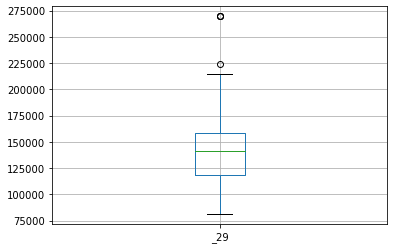

None

In [64]:
pandas1 = g1.toPandas()
pandas1.boxplot('_29')
display(plt.show());

In [65]:
g2 = SQLContext.createDataFrame(Grupo2)
g2.registerTempTable("g2")
g2.approxQuantile("_29",[0.25, 0.5, 0.75], 0)

[111500.0, 128000.0, 142125.0]

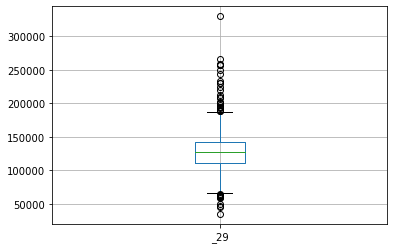

None

In [66]:
pandas2 = g2.toPandas()
pandas2.boxplot('_29')
display(plt.show());

Si comparamos los cuartiles de ambos grupos, podemos apreciar que el segundo tiene **menos varianza**, ya que su primer cuartil se encuentra en las 111,500um y su tercero en las 142,125um, mientras que el primer grupo 118964um y 159000um. Sin embargo, el segundo grupo tiene **más outliers** que el primero. 

***

## (COMPLEMENTARIA) Estudiar la relación entre el precio y el número de Garajes. (Recomiendo segmentar precio por cuartiles y estudiar el número de casos coincidentes)

Primero se crea un RDD que contenga las dos columnas que se utilizarán en este ejercicio: precio y número de garajes. 

In [67]:
rel = dataClean.map(lambda x: [x[28], x[21]])
rel.take(5)

[[215000.0, 2.0],
 [105000.0, 1.0],
 [172000.0, 1.0],
 [244000.0, 2.0],
 [189900.0, 2.0]]

In [68]:
from pyspark.sql import SQLContext
SQLContext = SQLContext(sc)

Posteriormente se crea un dataFrame de este RDD para poder calcular los cuartiles de la variable precio, para poder agruparla en función de estos con una función.

In [69]:
relDF = SQLContext.createDataFrame(rel)
relDF.registerTempTable("relDF")
relDF.approxQuantile("_1",[0.25, 0.5, 0.75], 0)

[129000.0, 159000.0, 211500.0]

In [70]:
def cuartiles(x):
    if 129000 > x :
        return 'MENOS DE 129.000'
    elif 129000 <= x < 159000 :
        return 'ENTRE 129.000 Y 159.000'
    elif 159000 <= x < 211500 :
        return 'ENTRE 159.000 Y 211.500'
    elif 211500 <= x :
        return 'MAS DE 211.500'
    else: 
        return x

In [71]:
cuart = dataClean.sortBy(lambda x: cuartiles(x[28])).map(lambda x: [cuartiles(x[28]), x[21]])

In [72]:
cuart.take(5)

[['ENTRE 129.000 Y 159.000', 2.0],
 ['ENTRE 129.000 Y 159.000', 2.0],
 ['ENTRE 129.000 Y 159.000', 2.0],
 ['ENTRE 129.000 Y 159.000', 1.0],
 ['ENTRE 129.000 Y 159.000', 2.0]]

In [76]:
avg = cuart.combineByKey(lambda value: (value, 1),
                           lambda x, value: (x[0] + value, x[1] + 1),
                           lambda x, y: (x[0] + y[0], x[1] + y[1])
                           )

avg = avg.map(lambda x: (x[0], x[1][0]/x[1][1],2))
avg.sortBy(lambda x: x[0], ascending = False).collect()

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.runJob.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 334.0 failed 1 times, most recent failure: Lost task 0.0 in stage 334.0 (TID 20130, 192.168.1.43, executor driver): org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/Users/beaquevedo/opt/anaconda3/lib/python3.8/site-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 605, in main
    process()
  File "/Users/beaquevedo/opt/anaconda3/lib/python3.8/site-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 595, in process
    out_iter = func(split_index, iterator)
  File "/Users/beaquevedo/opt/anaconda3/lib/python3.8/site-packages/pyspark/rdd.py", line 2596, in pipeline_func
    return func(split, prev_func(split, iterator))
  File "/Users/beaquevedo/opt/anaconda3/lib/python3.8/site-packages/pyspark/rdd.py", line 2596, in pipeline_func
    return func(split, prev_func(split, iterator))
  File "/Users/beaquevedo/opt/anaconda3/lib/python3.8/site-packages/pyspark/rdd.py", line 425, in func
    return f(iterator)
  File "/Users/beaquevedo/opt/anaconda3/lib/python3.8/site-packages/pyspark/rdd.py", line 1946, in combineLocally
    merger.mergeValues(iterator)
  File "/Users/beaquevedo/opt/anaconda3/lib/python3.8/site-packages/pyspark/python/lib/pyspark.zip/pyspark/shuffle.py", line 240, in mergeValues
    d[k] = comb(d[k], v) if k in d else creator(v)
  File "/Users/beaquevedo/opt/anaconda3/lib/python3.8/site-packages/pyspark/util.py", line 107, in wrapper
    return f(*args, **kwargs)
  File "<ipython-input-76-71e8f53b5434>", line 2, in <lambda>
TypeError: unsupported operand type(s) for +: 'float' and 'NoneType'

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:503)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:638)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:621)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:456)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator$GroupedIterator.fill(Iterator.scala:1209)
	at scala.collection.Iterator$GroupedIterator.hasNext(Iterator.scala:1215)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:458)
	at org.apache.spark.shuffle.sort.BypassMergeSortShuffleWriter.write(BypassMergeSortShuffleWriter.java:132)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:99)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:52)
	at org.apache.spark.scheduler.Task.run(Task.scala:127)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:446)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1377)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:449)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:748)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2059)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2008)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2007)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2007)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:973)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:973)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:973)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2239)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2188)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2177)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:775)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2099)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2120)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2139)
	at org.apache.spark.api.python.PythonRDD$.runJob(PythonRDD.scala:154)
	at org.apache.spark.api.python.PythonRDD.runJob(PythonRDD.scala)
	at sun.reflect.GeneratedMethodAccessor107.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)
Caused by: org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/Users/beaquevedo/opt/anaconda3/lib/python3.8/site-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 605, in main
    process()
  File "/Users/beaquevedo/opt/anaconda3/lib/python3.8/site-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 595, in process
    out_iter = func(split_index, iterator)
  File "/Users/beaquevedo/opt/anaconda3/lib/python3.8/site-packages/pyspark/rdd.py", line 2596, in pipeline_func
    return func(split, prev_func(split, iterator))
  File "/Users/beaquevedo/opt/anaconda3/lib/python3.8/site-packages/pyspark/rdd.py", line 2596, in pipeline_func
    return func(split, prev_func(split, iterator))
  File "/Users/beaquevedo/opt/anaconda3/lib/python3.8/site-packages/pyspark/rdd.py", line 425, in func
    return f(iterator)
  File "/Users/beaquevedo/opt/anaconda3/lib/python3.8/site-packages/pyspark/rdd.py", line 1946, in combineLocally
    merger.mergeValues(iterator)
  File "/Users/beaquevedo/opt/anaconda3/lib/python3.8/site-packages/pyspark/python/lib/pyspark.zip/pyspark/shuffle.py", line 240, in mergeValues
    d[k] = comb(d[k], v) if k in d else creator(v)
  File "/Users/beaquevedo/opt/anaconda3/lib/python3.8/site-packages/pyspark/util.py", line 107, in wrapper
    return f(*args, **kwargs)
  File "<ipython-input-76-71e8f53b5434>", line 2, in <lambda>
TypeError: unsupported operand type(s) for +: 'float' and 'NoneType'

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:503)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:638)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:621)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:456)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator$GroupedIterator.fill(Iterator.scala:1209)
	at scala.collection.Iterator$GroupedIterator.hasNext(Iterator.scala:1215)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:458)
	at org.apache.spark.shuffle.sort.BypassMergeSortShuffleWriter.write(BypassMergeSortShuffleWriter.java:132)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:99)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:52)
	at org.apache.spark.scheduler.Task.run(Task.scala:127)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:446)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1377)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:449)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	... 1 more


***

## (COMPLEMENTARIA) Las 10 viviendas con mejores servicios y mejor precio.

***

### Pista:
#### Calcula las variables: 
- Número de servicios excelentes
- Número de servicios buenos
...

#### Tendréis que tener en cuenta también variables como número de baños Full Bath, cocinas Kitchen AbvGr o dormitorios Bedroom AbvGr. Generando por ejemplo (número de estas variables por encima de media)

#### Finalmente precio de venta